# Task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools

#####################################
######### Regression Class ##########
#####################################

class RegressionModel:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.w = None

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Reshape to (n_samples, 1)

        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)

        #compute the weights using the closed-form solution
        Xt = X.T
        XtX = np.matmul(Xt, X)
        # add small amount to diag to prevent singular matrix
        I = np.identity(XtX.shape[0])
        eps = 0.00001
        I_eps = I * eps
        XtX  = XtX + I_eps
        inverse_XtX = np.linalg.inv(XtX)
        inverse_XtX_times_Xt = np.matmul(inverse_XtX, Xt)
        self.w = np.matmul(inverse_XtX_times_Xt, y)
        return self

    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Reshape to (n_samples, 1)

        # Predict outcomes for a given input feature matrix X
        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)
        prediction = np.matmul(X, self.w)
        return prediction

In [ ]:
#######################
### BASIS FUNCTIONS ###
#######################

x_plot = np.linspace(0, 10, 100)  # 100 points between 0 and 10

def gaussian_basis(x, mu, sigma=1):
    return np.exp(-((x - mu) ** 2) / (2 * sigma**2))

def polynomial_basis(x, degree):
    return x ** degree

def sigmoid_basis(x, mu, sigma=1):
    return 1 / (1 + np.exp(-(x - mu) / sigma))

def tanh_basis(x, mu, sigma=1):
    return np.tanh((x - mu) / sigma)

def rbf_basis(x, mu, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma)**2)

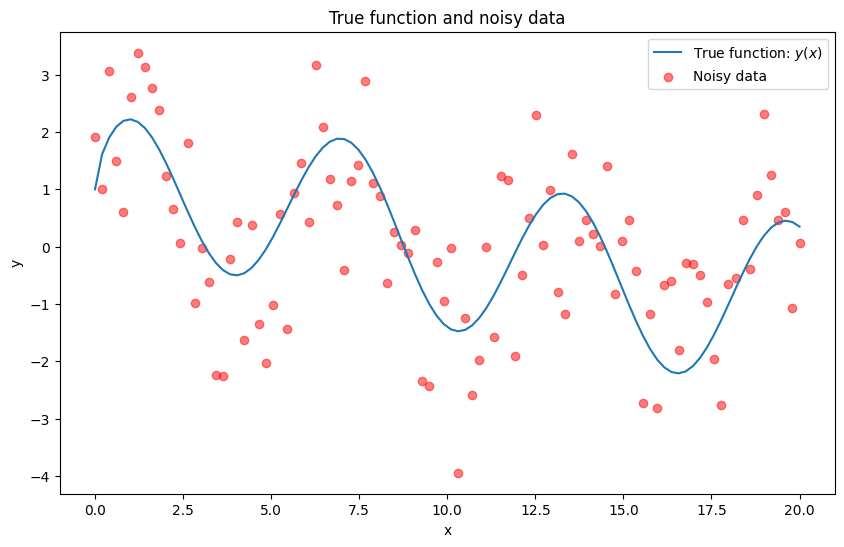

(100,)
(100, 3)
(100, 6)
(100, 9)
(100, 12)
(100, 15)
(100, 18)
(100, 21)
(100, 24)
(100, 27)
(100, 30)
(100, 33)


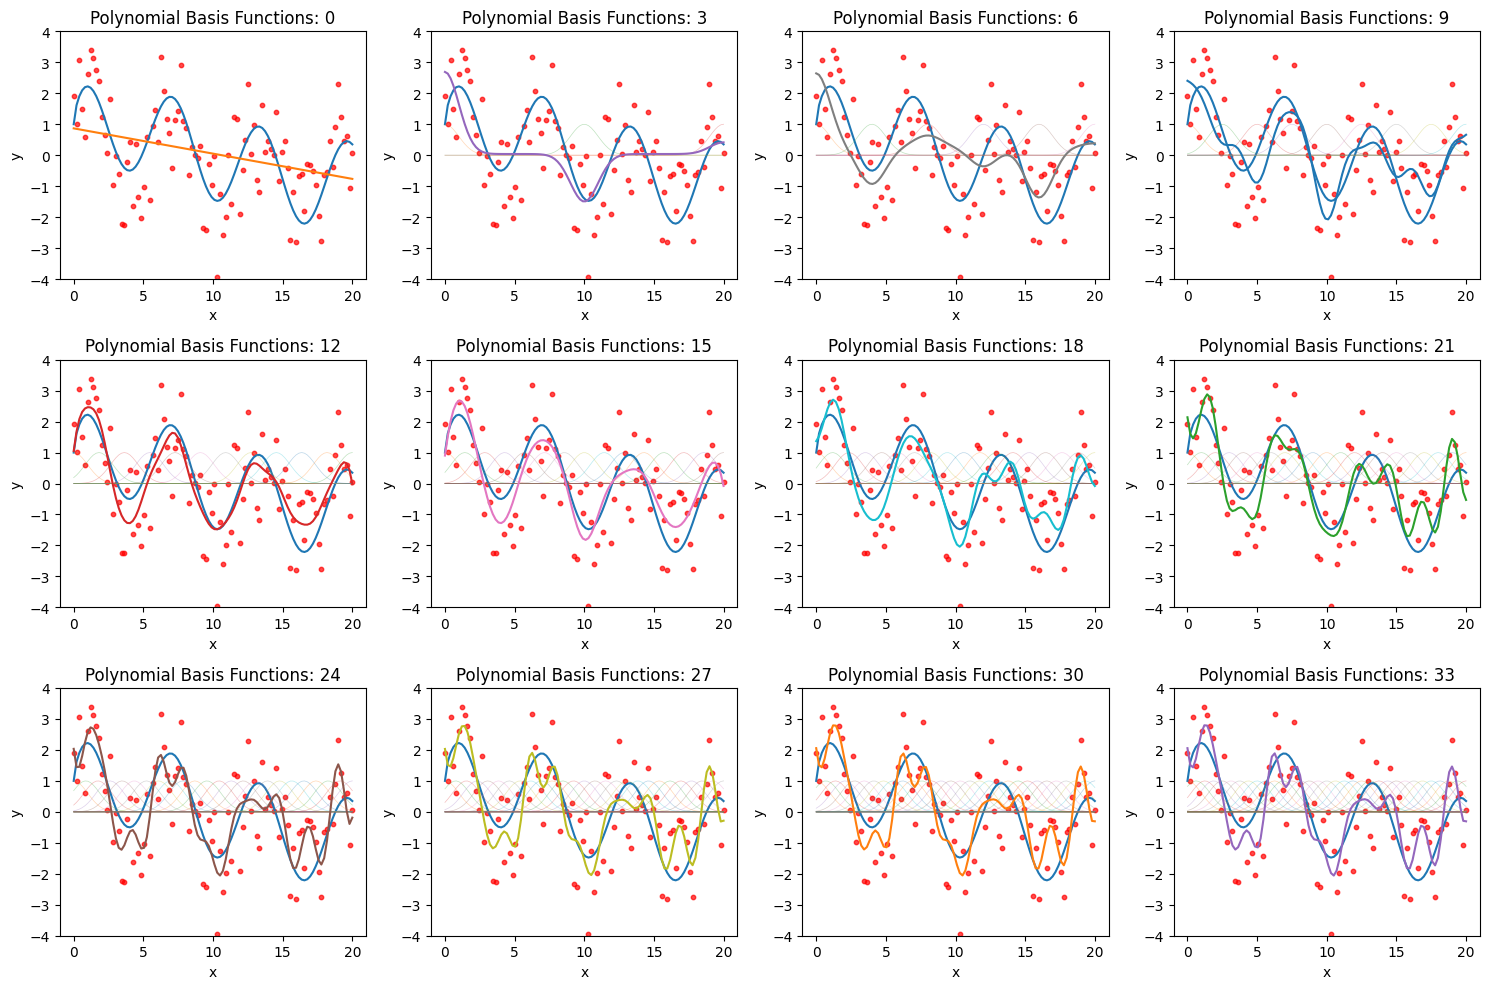

In [ ]:
#####################
#### PARAMETERS #####
#####################

n_points = 100                        # the number of sampled data points
rrange = 20                            # the range of the x-axis
sigma = 1                             # the std dev of the gaussian bases (this was set to 1 in the instructions)
mu_range = 20                         # the range of the mu values for the gaussian bases
basis_counts = np.arange(0, 34, 3)  # the numbers of bases to test on
#basis_counts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])  # max 12 basis functions
#####################
#####################
#####################


# 1. Data Generation: Generate 100 data points sampled from the non-linear function
np.random.seed(69) # set seed
x = np.linspace(0, rrange, n_points) # sample uniformly separated points in the specified range
epsilon = np.random.normal(0, 1, n_points) # generate random noise vector
y_true = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x) # pass the points through the function
y_noisy = y_true + epsilon # add noise

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="True function: $y(x)$")
plt.scatter(x, y_noisy, color='r', label="Noisy data", alpha=0.5)
plt.title("True function and noisy data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Model fitting with varying number of basis functions
plt.figure(figsize=(15, 10))
for D in basis_counts:
    # Generate Gaussian basis functions
    if D > 0:
        mus = np.linspace(0, mu_range, D)
        X_basis = np.array([gaussian_basis(x, mu, sigma) for mu in mus]).T
        #X_basis = np.array([polynomial_basis(x, deg) for deg in mus]).T
        basis_functions = [gaussian_basis(x, mu, sigma) for mu in mus]
        #basis_functions = [polynomial_basis(x, deg) for deg in mus]
    else:
        # If D=0, use no transformation (just a constant basis)
        X_basis = x

    print(X_basis.shape)
    # Fit linear regression model
    model = RegressionModel(True).fit(X_basis, y_noisy)
    # Predictions
    y_pred = model.predict(X_basis)

    # Plotting
    plt.subplot(3, 4, basis_counts.tolist().index(D) + 1)

    plt.plot(x, y_true, label="True function")
    if D > 0:
        for i, basis_function in enumerate(basis_functions):
            plt.plot(x, basis_function, label=f"$\mu$ = {mus[i]}", alpha=0.3, linewidth=0.5)
    plt.scatter(x, y_noisy, color='r', label="Noisy data", alpha=0.7, s=10)
    plt.plot(x, y_pred, label=f"Model with {D} Gaussians")
    plt.title(f"Polynomial Basis Functions: {D}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-4, 4)
plt.tight_layout()
plt.show()

In [ ]:
import builtins
# 4. Model Selection:
# split the data into train and validation sets
np.random.seed(69) # set seed
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.2, random_state=69)
SSEs = []
train_SSEs = []

# PARAMETERS
sigma = 1
basis_counts = np.arange(0, 101, 10)  # the numbers of bases to test on
#basis_counts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])  # max 12 basis functions


for D in basis_counts:
    # Generate Gaussian basis functions
    if D > 0:
        mus = np.linspace(0, 20, D)
        X_basis_train = np.array([gaussian_basis(x_train, mu) for mu in mus]).T
        X_basis_val = np.array([gaussian_basis(x_val, mu) for mu in mus]).T

        #X_basis_train = np.array([polynomial_basis(x_train, mu) for mu in mus]).T
        #X_basis_val = np.array([polynomial_basis(x_val, mu) for mu in mus]).T

    else:
        # If D=0, use no transformation (just a constant basis)
        X_basis_train = x_train
        X_basis_val = x_val

    print(X_basis_train.shape)
    # Fit linear regression model on the training set
    model = RegressionModel(True).fit(X_basis_train, y_train)
    # compute predictions on the validation set
    y_pred = model.predict(X_basis_val)
    y_pred_train = model.predict(X_basis_train)
    # compute the SSE
    sse = 0
    sse_train = 0
    for i in builtins.range(len(y_pred)): # Change 'range' to 'builtins.range'
        sse += (y_pred[i] - y_val[i])**2
        sse_train += (y_pred_train[i] - y_train[i])**2

    SSEs.append(sse)
    train_SSEs.append(sse_train)
print(train_SSEs)
print(SSEs)
SSEs = np.array(SSEs)
index_min = np.argmin(SSEs)
print("The optimal number of bases is ", basis_counts[index_min], ", with a SSE of ", SSEs[index_min])


(80,)
(80, 10)
(80, 20)
(80, 30)
(80, 40)
(80, 50)
(80, 60)
(80, 70)
(80, 80)
(80, 90)
(80, 100)
[43.112378548619795, 25.41802369626427, 11.784275285401828, 10.319844177191575, 10.248233047277104, 10.186603413624795, 10.134713284950664, 10.09021500062174, 10.051551051358798, 10.017618894421746, 9.987599103649812]
[65.32369359185792, 34.285674555736065, 29.904376523180495, 36.38206228914776, 37.26440203534813, 37.815316951617994, 38.26986744543189, 38.672771304751066, 39.039781707879236, 39.37863385606562, 39.69399957695687]
The optimal number of bases is  20 , with a SSE of  29.904376523180495


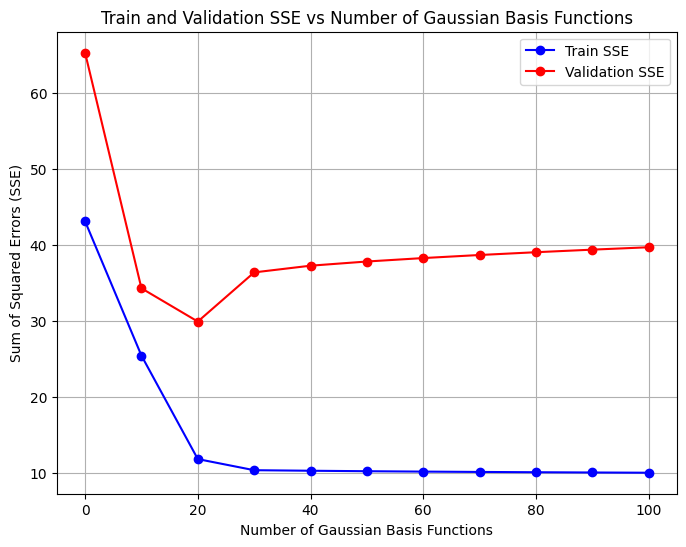

In [ ]:
# Plotting the SSE values
plt.figure(figsize=(8, 6))
plt.plot(basis_counts, train_SSEs, label='Train SSE', marker='o', linestyle='-', color='blue')
plt.plot(basis_counts, SSEs, label='Validation SSE', marker='o', linestyle='-', color='red')

# Adding labels and title
plt.xlabel('Number of Gaussian Basis Functions')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Train and Validation SSE vs Number of Gaussian Basis Functions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# def generate_data(n_points, verbose=False, seed=69):
#   np.random.seed(seed)
#   x = np.linspace(0, 20, n_points) # sample 100 uniformly separated points in the range [0,20]
#   epsilon = np.random.normal(0, 1, n_points)
#   y_true = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x)
#   y_noisy = y_true + epsilon

#   if verbose:
#     plt.figure(figsize=(10, 6))
#     plt.plot(x, y_true, label="True function: $y(x)$")
#     plt.scatter(x, y_noisy, color='r', label="Noisy data", alpha=0.5)
#     plt.title("True function and noisy data")
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.legend()
#     plt.show()

#   return y_true, y_noisy

# def get_basis_matrix(X, array_of_mus, D):
#   if D == 0:
#     return X

#   else:
#     basis_matrix = np.zeros((len(X), D)) # initialize new matrix with needed dimensions
#     for i in range(D):
#       # we want to find [phi_i(x)]_{x in data}, call this array A
#       basis_matrix[:, i] = np.array([gaussian_basis(x, array_of_mus[i]) for x in X])

#     return basis_matrix

# def linreg_with_bases(x, y_noisy, D, verbose):
#   x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.2, random_state=20)
#   mus = np.linspace(0, 20, D)

#   X_basis_train = get_basis_matrix(x_train, mus, D)
#   X_basis_val = get_basis_matrix(x_val, mus, D)

#   model = RegressionModel(True).fit(X_basis_train, y_train)

#   y_pred_train = model.predict(X_basis_train)
#   y_pred_val = model.predict(X_basis_val)

#   SSE_train, SSE_val = 0, 0
#   for i in range(len(y_pred_train)):
#     SSE_train += (y_pred_train[i] - y_train[i]) ** 2
#   for i in range(len(y_pred_val)):
#     SSE_val += (y_pred_val[i] - y_val[i]) ** 2

#   print(f"Train SSE is {SSE_train} using {D} bases")
#   print(f"Val SSE is {SSE_val} using {D} bases")

#   if verbose:
#     plot_model(model, D, x_train, x_val, y_noisy, y_true, y_pred_train, y_pred_val)

#   return SSE_train, SSE_val

# def plot_model(model, D, x_train, x_val, y_noisy, y_true, y_pred_train, y_pred_val):
#     plt.subplot(3, 4, basis_counts.tolist().index(D) + 1)
#     plt.plot(x, y_true, label="True function", color='blue')
#     plt.scatter(x, y_noisy, color='r', label="Noisy data", alpha=0.5, s=10)
#     plt.plot(x_train, y_pred_train, label=f"Train Prediction", color='orange')
#     plt.plot(x_val, y_pred_val, label=f"Validation Prediction", color='green')
#     plt.title(f"Gaussian Basis Functions: {D}")
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.show()

# ### TESTING: ###
# X = np.random.uniform(0, 20, 100)
# y_true, y_noisy = generate_data(100, False)
# linreg_with_bases(X, y_noisy, 0, True)


# Task 2

In [ ]:
def gaussian_basis(x, mu, sigma=1):
    return np.exp(-((x - mu) ** 2) / (sigma**2))

def get_basis_function(x, mus, sigma_basis):
    return [gaussian_basis(x, mu, sigma_basis) for mu in mus]

def Linear_Regression_Gauss_Basis(basis_count, basis_range = 20, x_num_points = 100, x_range = 20, sigma_basis = 1, random_seed=None):
    # np.random.seed(69) # setting a random seed for testing
    if random_seed is not None:
        np.random.seed(random_seed)

    x = np.linspace(0, x_range, x_num_points) # sample uniformly separated points in the specified range
    epsilon = np.random.normal(0, 1, x_num_points) # generate random noise vector
    y_true = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x) # pass the points through the function
    y_noisy = y_true + epsilon # add noise

    # Non-linear basis functions
    if basis_count == 0:
        x_basis = x
        mus = [0]
        basis_functions = [x]
    else:
        mus = np.linspace(0, basis_range, basis_count) # setting the mus based on the number of basis functions
        basis_functions = get_basis_function(x, mus, sigma_basis) # this is probably going to be removed
        x_basis = np.array(basis_functions).T


    # return all the variables that will be needed for plots or different tasks
    return x, y_true, y_noisy, x_basis, mus, basis_functions

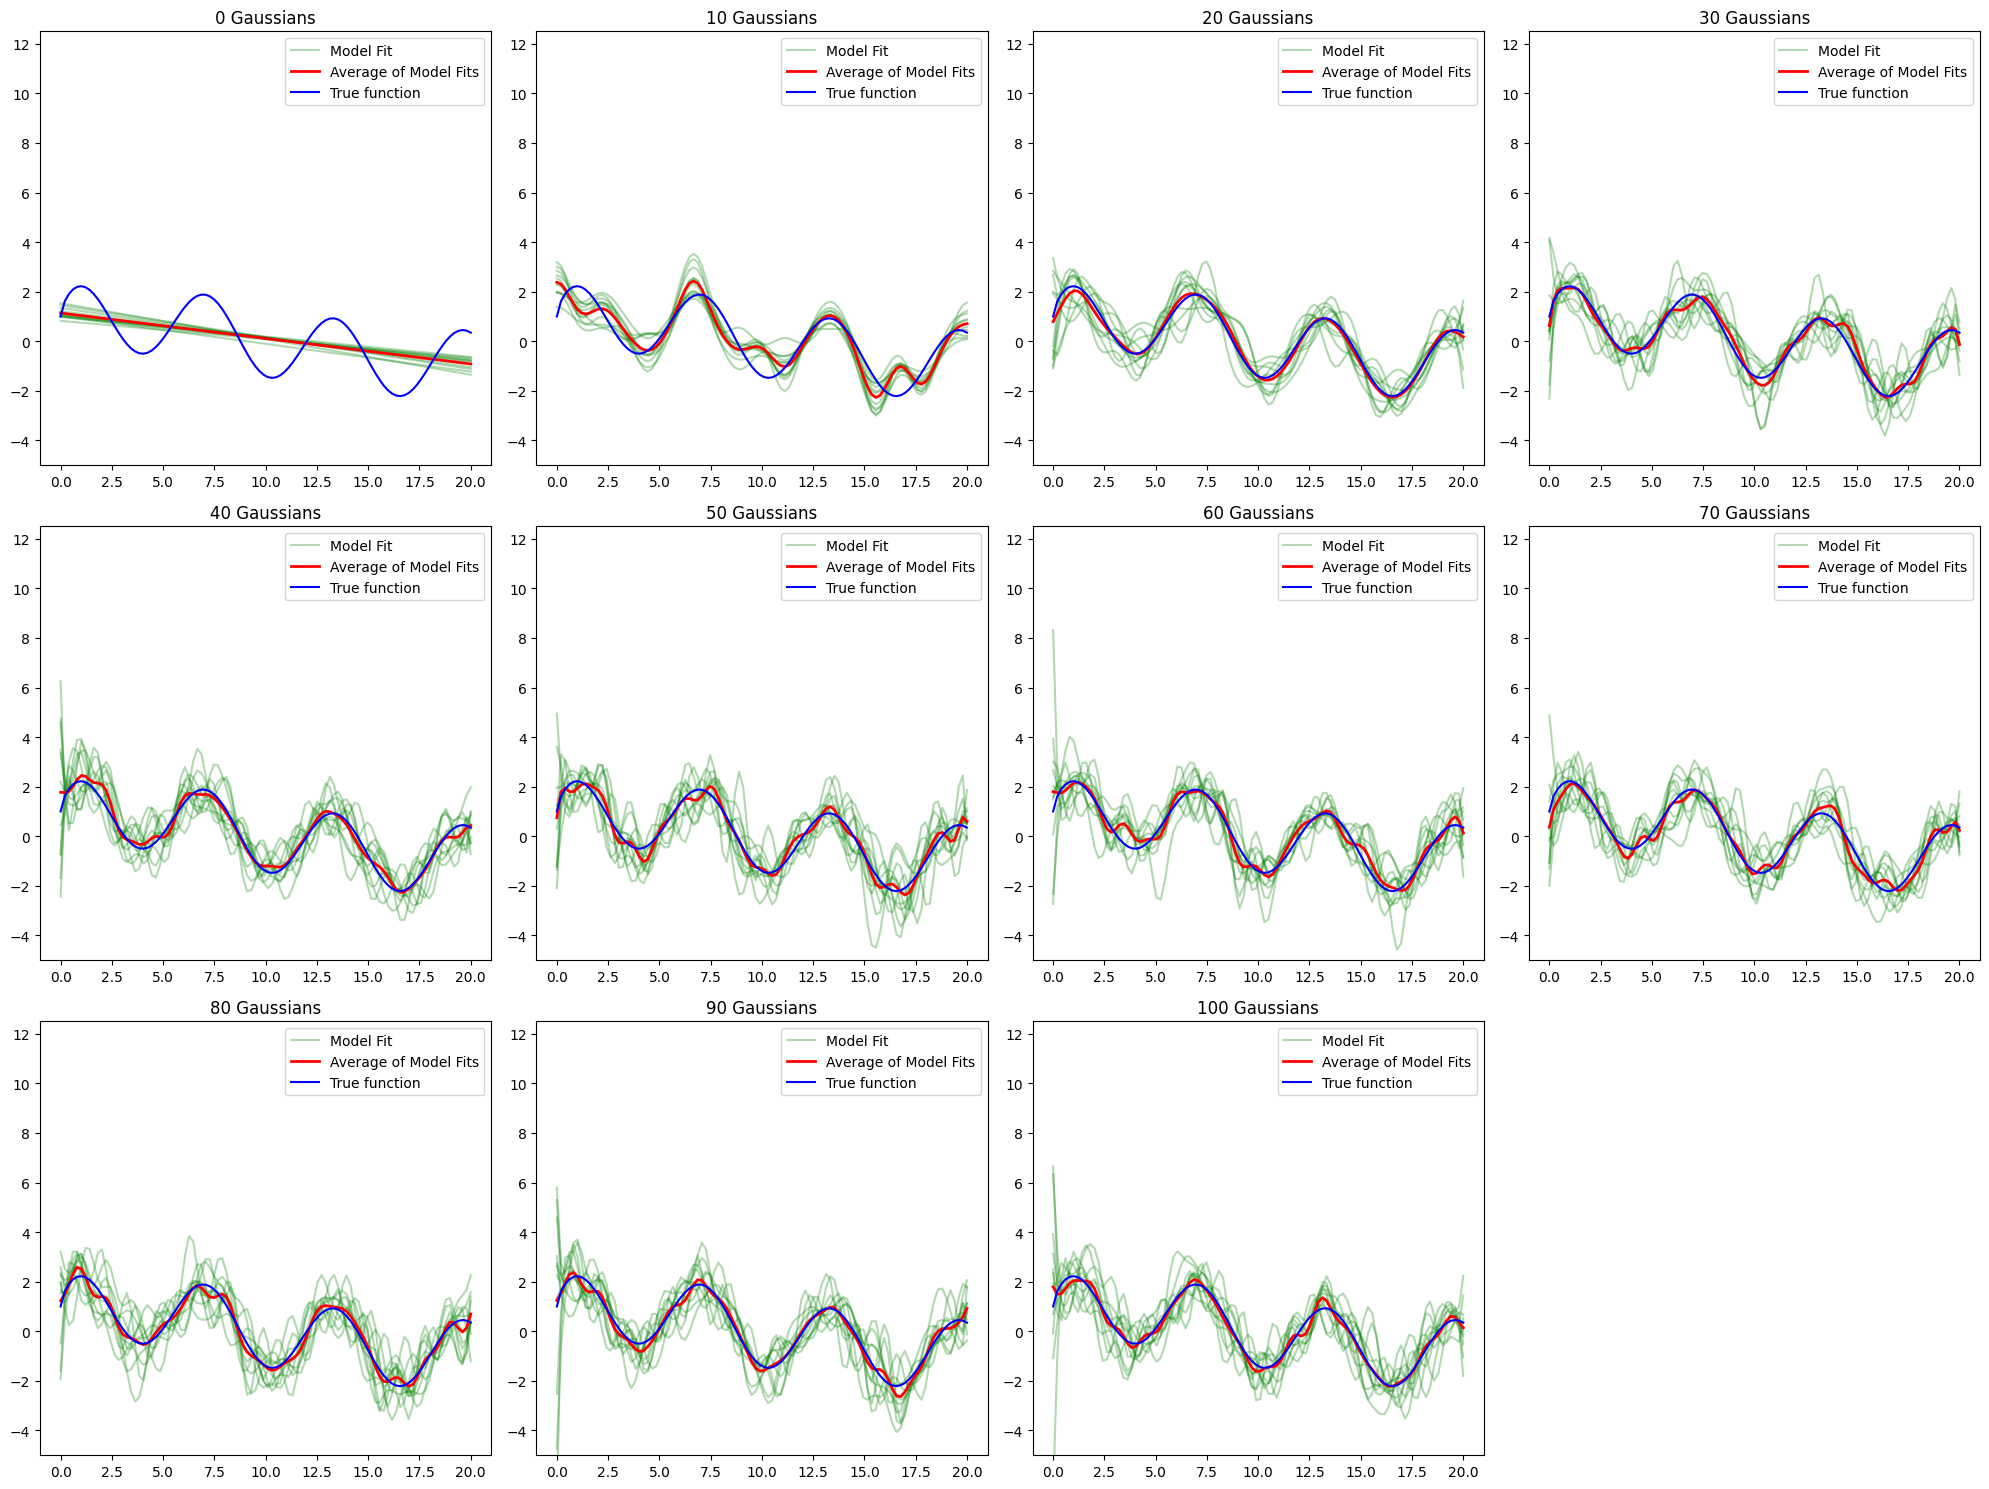

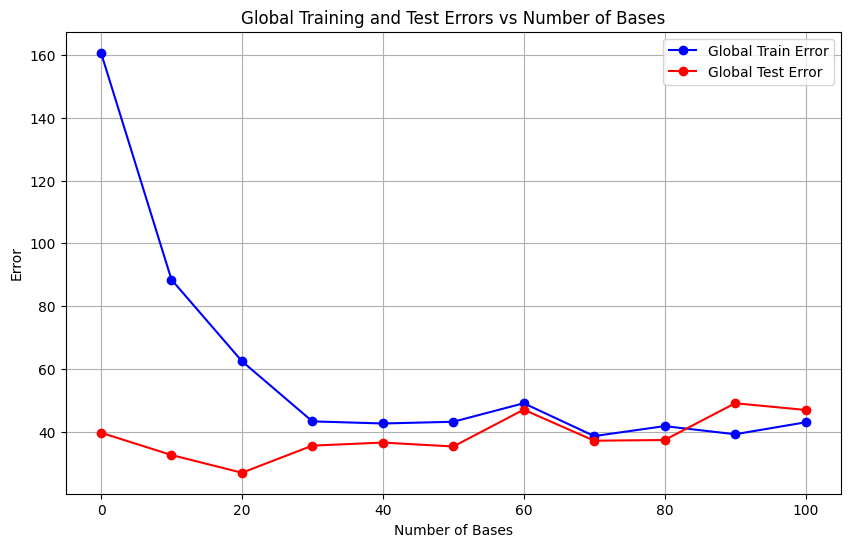

In [ ]:
def compute_sse(y_true, y_pred):
    """Compute the sum of squared errors."""
    return np.sum((y_true - y_pred) ** 2)


def task2():

  bases = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
  global_train_errors = []
  global_test_errors = []

  # Define the grid layout for subplots: 3 rows and 4 columns (since there are 11 bases, this creates one extra plot)
  fig, axs = plt.subplots(3, 4, figsize=(20, 15))
  axs = axs.flatten()  # Flatten to iterate over it more easily

  # Set uniform axis limits
  x_limits = (-1, 21)
  y_limits = (-5, 12.5)

  for idx, basis in enumerate(bases):
    train_error, test_error = 0, 0
    sum_model_fits = np.zeros(100)

    for i in range(11):
      # Generate data and basis expansion
      x, y_true, y_noisy, x_basis, mus, basis_functions = Linear_Regression_Gauss_Basis(basis)
      X_train, X_test, y_train, y_test = train_test_split(x_basis, y_noisy, test_size=0.2, random_state=42)

      # Train the model on training data (basis-expanded)
      model = RegressionModel(True).fit(X_train, y_train)

      # Predict on the full x_basis to plot the fits
      model_prediction = model.predict(x_basis)
      sum_model_fits += model_prediction

      # Calculate errors for train and test data
      y_pred_train = model.predict(X_train)
      train_error += compute_sse(y_train, y_pred_train)
      y_pred_test = model.predict(X_test)
      test_error += compute_sse(y_test, y_pred_test)

      # Plot each model fit for the current basis using `x`
      axs[idx].plot(x, model_prediction, color='green', alpha=0.3, label=f"Model Fit" if i == 0 else None)

    global_train_errors.append(train_error / 11)
    global_test_errors.append(test_error / 11)

    # Calculate and plot the average model fit
    avg_model_fits = sum_model_fits / 11
    axs[idx].plot(x, avg_model_fits, color='red', label="Average of Model Fits", linewidth=2)

    # Plot the true function
    axs[idx].plot(x, y_true, label="True function", color='blue')

    axs[idx].set_title(f"{basis} Gaussians")
    axs[idx].legend()

    # Set the same x and y limits for all subplots
    axs[idx].set_xlim(x_limits)
    axs[idx].set_ylim(y_limits)

  # Remove the last (extra) subplot
  fig.delaxes(axs[-1])

  # Adjust layout for better spacing
  plt.tight_layout()
  plt.show()

  # After looping through all bases, plot global train and test errors
  plt.figure(figsize=(10, 6))
  plt.plot(bases, global_train_errors, label="Global Train Error", marker='o', color='blue')
  plt.plot(bases, global_test_errors, label="Global Test Error", marker='o', color='red')
  plt.xlabel("Number of Bases")
  plt.ylabel("Error")
  plt.title("Global Training and Test Errors vs Number of Bases")
  plt.legend()
  plt.grid(True)
  plt.show()

task2()

# Task 3

### Regression with regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#####################################
######### Regression Class ##########
#####################################

class RegressionModel:
    def __init__(self, add_bias=True, reg_type="", lam=0, max_iters=0, learning_rate=0):
        self.add_bias = add_bias
        self.w = None
        self.reg_type = reg_type
        self.lam = lam
        self.max_iters = max_iters
        self.learning_rate = learning_rate

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Reshape to (n_samples, 1)

        m, n = X.shape

        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)

        if self.reg_type == 'L2': # w = (X^t * X + lambda * I)^-1 * X^t * y
          XtX = X.T @ X
          lambda_I = self.lam * np.identity(XtX.shape[0])
          inverse = np.linalg.inv(XtX + lambda_I)
          self.w = (inverse @ X.T) @ y

        else:

          if self.w is None:
            self.w = np.zeros(n+1)

          for _ in range(self.max_iters):
            grad = 1/m * X.T @ (X @ self.w - y)
            grad[1:] += self.lam * np.sign(self.w[1:])
            self.w = self.w - self.learning_rate * grad

        return self.w

    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Reshape to (n_samples, 1)

        # Predict outcomes for a given input feature matrix X
        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)
        prediction = np.matmul(X, self.w)
        return prediction

### K Fold function

In [ ]:
import numpy as np

def K_Fold(X, y, y_true, n_splits=10, shuffle=True, random_state=42):
    # Shuffle the data
    if shuffle:
        if random_state is not None:
            np.random.seed(random_state)
        indices = np.random.permutation(len(X))  # Randomly shuffle the indices
    else:
        indices = np.arange(len(X))

    # Split indices into k folds, adjusting for the case where the number of data points is not divisible by fold size
    fold_sizes = len(X) // n_splits
    remainder = len(X) % n_splits
    folds = []

    current = 0
    for i in range(n_splits):
        next_fold_size = fold_sizes + (1 if i < remainder else 0)
        folds.append(indices[current:current + next_fold_size])
        current += next_fold_size

    # Iterate through each fold for training and validation
    for i in range(n_splits):
        # Validation indices are the current fold
        val_indices = folds[i]
        # Training indices are all the other folds combined
        train_indices = np.concatenate([folds[j] for j in range(n_splits) if j != i])

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        y_true_train, y_true_val = y_true[train_indices], y_true[val_indices]


        yield X_train, X_val, y_train, y_val, y_true_train, y_true_val


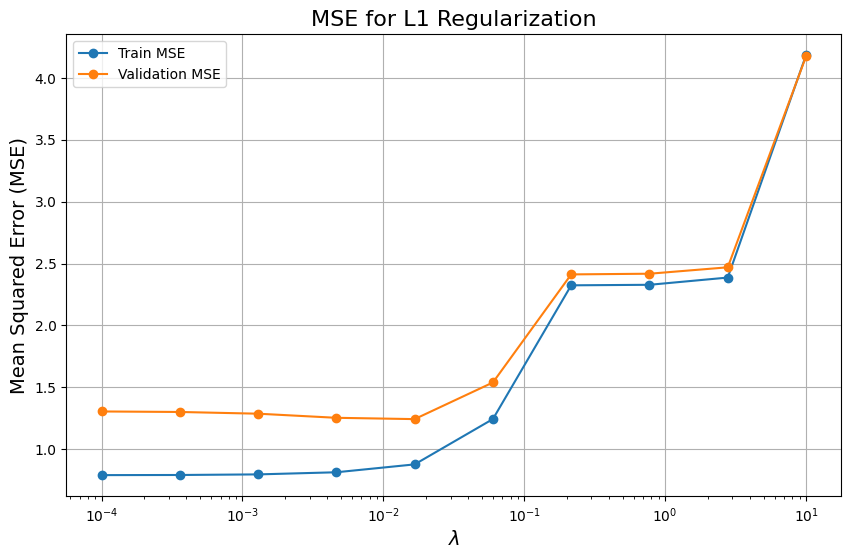

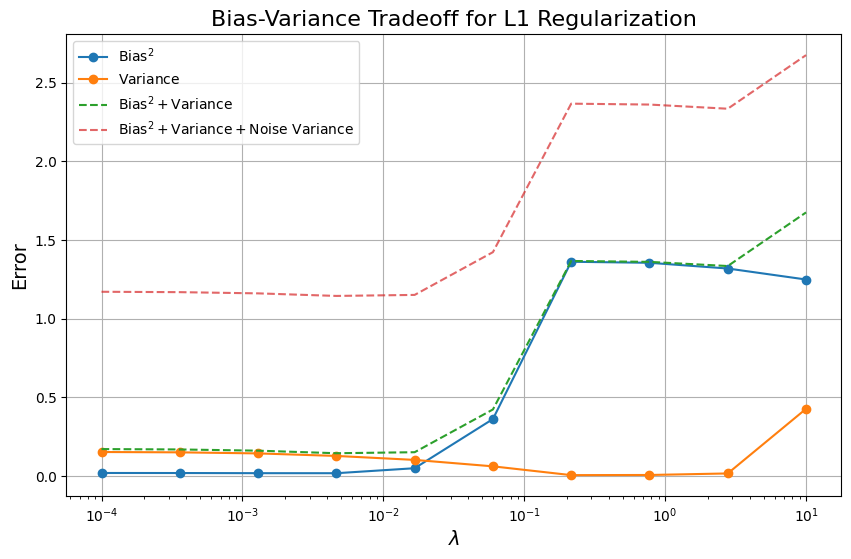

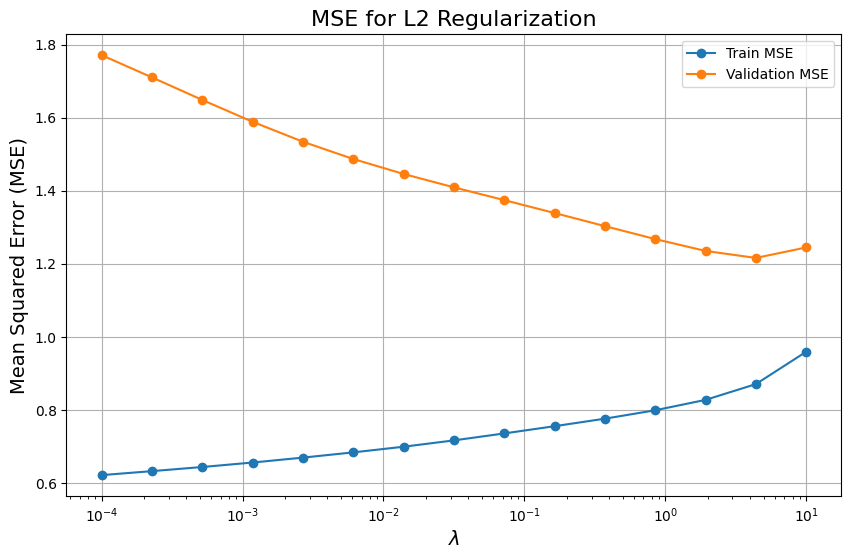

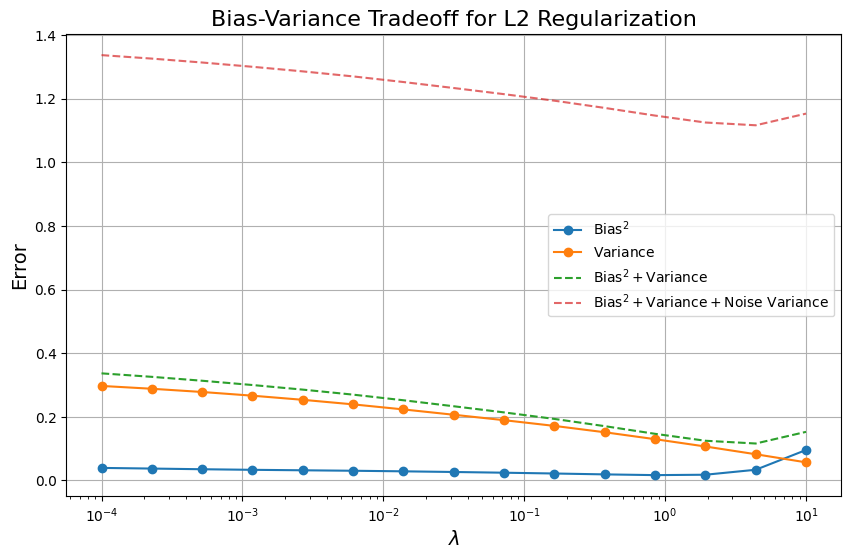

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def Task3(num_points, num_datasets, num_lambdas, reg_type='L1', max_iters=1000, learning_rate=0.1, noise_variance=1):
    lambdas = np.logspace(-4, 1, num=num_lambdas) # adjust endpoint of the logspace to 2 for L2
    # initialize global variables
    variance_array = np.array([])
    bias_array = np.array([])

    MSE_train_array = np.array([])
    MSE_val_array = np.array([])

    for lambda_val in lambdas:  # looping on regularization parameters
        # array to store all the models trained on their respective dataset
        f_hat_D_array = np.zeros((0, num_points))

        # array to store the MSEs for every given lambda
        MSE_train_per_dataset_array = np.array([])
        MSE_val_per_dataset_array = np.array([])

        for i in range(num_datasets):  # loop on the number of datasets we want to make
            # generate a dataset
            random_seed = i
            x, y_true, y_noisy, x_basis, mus, basis_functions = Linear_Regression_Gauss_Basis(70, basis_range=20, x_num_points=num_points, random_seed=random_seed)

            MSE_per_fold_training = np.array([])
            MSE_per_fold_val = np.array([])
            fold_model_prediction = np.zeros((0, num_points))

            # Loop for 10-fold cross-validation
            for fold, (X_train, X_val, y_train, y_val, y_true_train, y_true_val) in enumerate(K_Fold(x_basis, y_noisy, y_true, n_splits=10, shuffle=True, random_state=42)):
                # Train the model on the 9 folds
                model = RegressionModel(True, reg_type=reg_type, lam=lambda_val, max_iters=max_iters, learning_rate=learning_rate)
                model.fit(X_train, y_train)

                # Predict on train and validation sets
                y_pred_train = model.predict(X_train)
                y_pred_val = model.predict(X_val)

                # Calculate squared error for this fold
                MSE_train = np.mean((y_pred_train - y_train) ** 2)
                MSE_per_fold_training = np.append(MSE_per_fold_training, MSE_train)

                MSE_val = np.mean((y_pred_val - y_val) ** 2)
                MSE_per_fold_val = np.append(MSE_per_fold_val, MSE_val)

                # Getting f for each model and storing it in an array
                fold_prediction = model.predict(x_basis)
                fold_model_prediction = np.vstack([fold_model_prediction, fold_prediction])

            # Taking the average of the MSE for the folds and append
            MSE_dataset_train = np.mean(MSE_per_fold_training)
            MSE_dataset_val = np.mean(MSE_per_fold_val)
            MSE_train_per_dataset_array = np.append(MSE_train_per_dataset_array, MSE_dataset_train)
            MSE_val_per_dataset_array = np.append(MSE_val_per_dataset_array, MSE_dataset_val)

            # taking the average of the function of each fold
            f_hat_D = fold_model_prediction.mean(axis=0)
            f_hat_D_array = np.vstack([f_hat_D_array, f_hat_D])

        # Calculate the mean train and val MSE for this lambda
        mean_train_MSE_lambda = np.mean(MSE_train_per_dataset_array)
        MSE_train_array = np.append(MSE_train_array, mean_train_MSE_lambda)

        mean_val_MSE_lambda = np.mean(MSE_val_per_dataset_array)
        MSE_val_array = np.append(MSE_val_array, mean_val_MSE_lambda)

        # compute the expected value of the model function
        expected_f_dataset = f_hat_D_array.mean(axis=0)

        # calculate variance
        SSE_variance = np.zeros_like(expected_f_dataset)
        for square_diff in f_hat_D_array:
            SSE_variance += ((square_diff - expected_f_dataset) ** 2)
        variance = np.mean(SSE_variance) / num_datasets
        variance_array = np.append(variance_array, variance)

        # calculate bias squared
        bias_squared = np.mean((y_true - expected_f_dataset) ** 2)
        bias_array = np.append(bias_array, bias_squared)

    # Plot MSEs
    plot_MSE(lambdas, MSE_train_array, MSE_val_array, reg_type)

    # Plot Bias-Variance tradeoff
    plot_bias_variance_tradeoff(lambdas, bias_array, variance_array, noise_variance, reg_type)

# Plot MSE function for training and validation
def plot_MSE(lambdas, MSE_train_array, MSE_val_array, reg_type):
    plt.figure(figsize=(10, 6))

    plt.plot(lambdas, MSE_train_array, label='Train MSE', marker='o')
    plt.plot(lambdas, MSE_val_array, label='Validation MSE', marker='o')

    plt.xscale('log')
    plt.xlabel(r'$\lambda$', fontsize=14)
    plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
    plt.title(f'MSE for {reg_type} Regularization', fontsize=16)

    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Bias-Variance tradeoff function
def plot_bias_variance_tradeoff(lambdas, bias_array, variance_array, noise_variance, reg_type):
    bias_variance_sum = bias_array + variance_array
    bias_variance_noise_sum = bias_variance_sum + noise_variance

    plt.figure(figsize=(10, 6))

    plt.plot(lambdas, bias_array, label=r'$\mathrm{Bias}^2$', marker='o')
    plt.plot(lambdas, variance_array, label=r'$\mathrm{Variance}$', marker='o')
    plt.plot(lambdas, bias_variance_sum, label=r'$\mathrm{Bias}^2 + \mathrm{Variance}$', linestyle='--')
    plt.plot(lambdas, bias_variance_noise_sum, label=r'$\mathrm{Bias}^2 + \mathrm{Variance} + \mathrm{Noise\ Variance}$', linestyle='--', alpha=0.7)

    plt.xscale('log')
    plt.xlabel(r'$\lambda$', fontsize=14)
    plt.ylabel('Error', fontsize=14)
    plt.title(f'Bias-Variance Tradeoff for {reg_type} Regularization', fontsize=16)

    plt.legend()
    plt.grid(True)
    plt.show()

# Run Task3 for both L1 and L2 regularization and plot the results
Task3(100, 10, 10, reg_type='L1')
Task3(100, 10, 15, reg_type='L2')


# Task 4

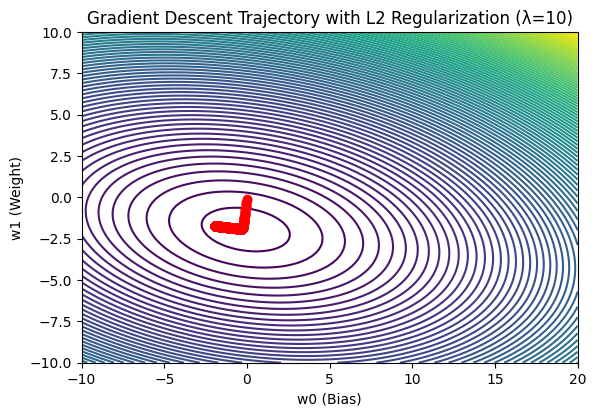

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

def compute_loss(w, X, y, lam, reg_type):
    w = np.array(w)
    w0, w1 = w[0], w[1]
    predictions = w0 + w1 * X.squeeze()

    mse_loss = np.mean((y - predictions) ** 2)

    # Regularization term
    if reg_type == 'L2':
        reg_loss = lam * np.sum(w ** 2)  # L2 regularization (squared weights)
    else:
        reg_loss = lam * np.sum(np.abs(w))  # L1 regularization (absolute weights)

    total_loss = mse_loss + reg_loss
    return total_loss

def contour_loss(w, X, y, lam, reg_type):
    return compute_loss(w, X, y, lam=lam, reg_type=reg_type)


# GD Regression Model with trajectory
class GDRegressionModel:
    def __init__(self, add_bias=True, reg_type="L2", lam=0, num_iterations=1000, learning_rate=0.01):
        self.add_bias = add_bias
        self.w = None
        self.reg_type = reg_type
        self.lam = lam
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.trajectory = []

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Reshape to (n_samples, 1)

        m, n = X.shape

        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)  # Add bias term to X

        if self.w is None:
            self.w = np.zeros(n + 1)  # Initialize weights including bias

        for _ in range(self.num_iterations):
            grad = 1/m * X.T @ (X @ self.w - y)

            if self.reg_type == 'L2':
                grad[1:] += self.lam * self.w[1:]
            else:
                grad[1:] += self.lam * np.sign(self.w[1:])

            self.w = self.w - self.learning_rate * grad

            # Log the weights at each step for trajectory plotting
            self.trajectory.append(self.w.copy())

        return self.w

    def predict(self, X):
        if self.add_bias:
            X = np.insert(X, 0, 1, axis=1)  # Add bias term to X if applicable
        return X @ self.w

#########################
###### Driver code ######
#########################

def task4(lam, reg_type):
  # Generate 50 data pts:
  x = np.random.uniform(0, 10, 50)
  epsilon = np.random.normal(0, 1, 50)
  y = -4 * x + 10 + 2 * epsilon
  X = x.reshape(-1, 1)

  # get and fit the model
  model = GDRegressionModel(reg_type=reg_type, lam=lam, num_iterations=10000, learning_rate=0.001)
  model.fit(X, y)

  #Plot result
  fig, ax = plt.subplots()
  plot_contour(lambda w: contour_loss(w, X, y, lam, reg_type), [-10, 20], [-10, 10], 100, ax)

  trajectory = np.array(model.trajectory)
  ax.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red')
  ax.set_xlim([-10, 20])  # Adjust x-axis limits
  ax.set_ylim([-10, 10])
  ax.set_aspect('equal')
  plt.title(f'Gradient Descent Trajectory with {reg_type} Regularization (λ={lam})')
  plt.xlabel('w0 (Bias)')
  plt.ylabel('w1 (Weight)')

  # Display the plot
  plt.show()

task4(lam=10, reg_type='L2')

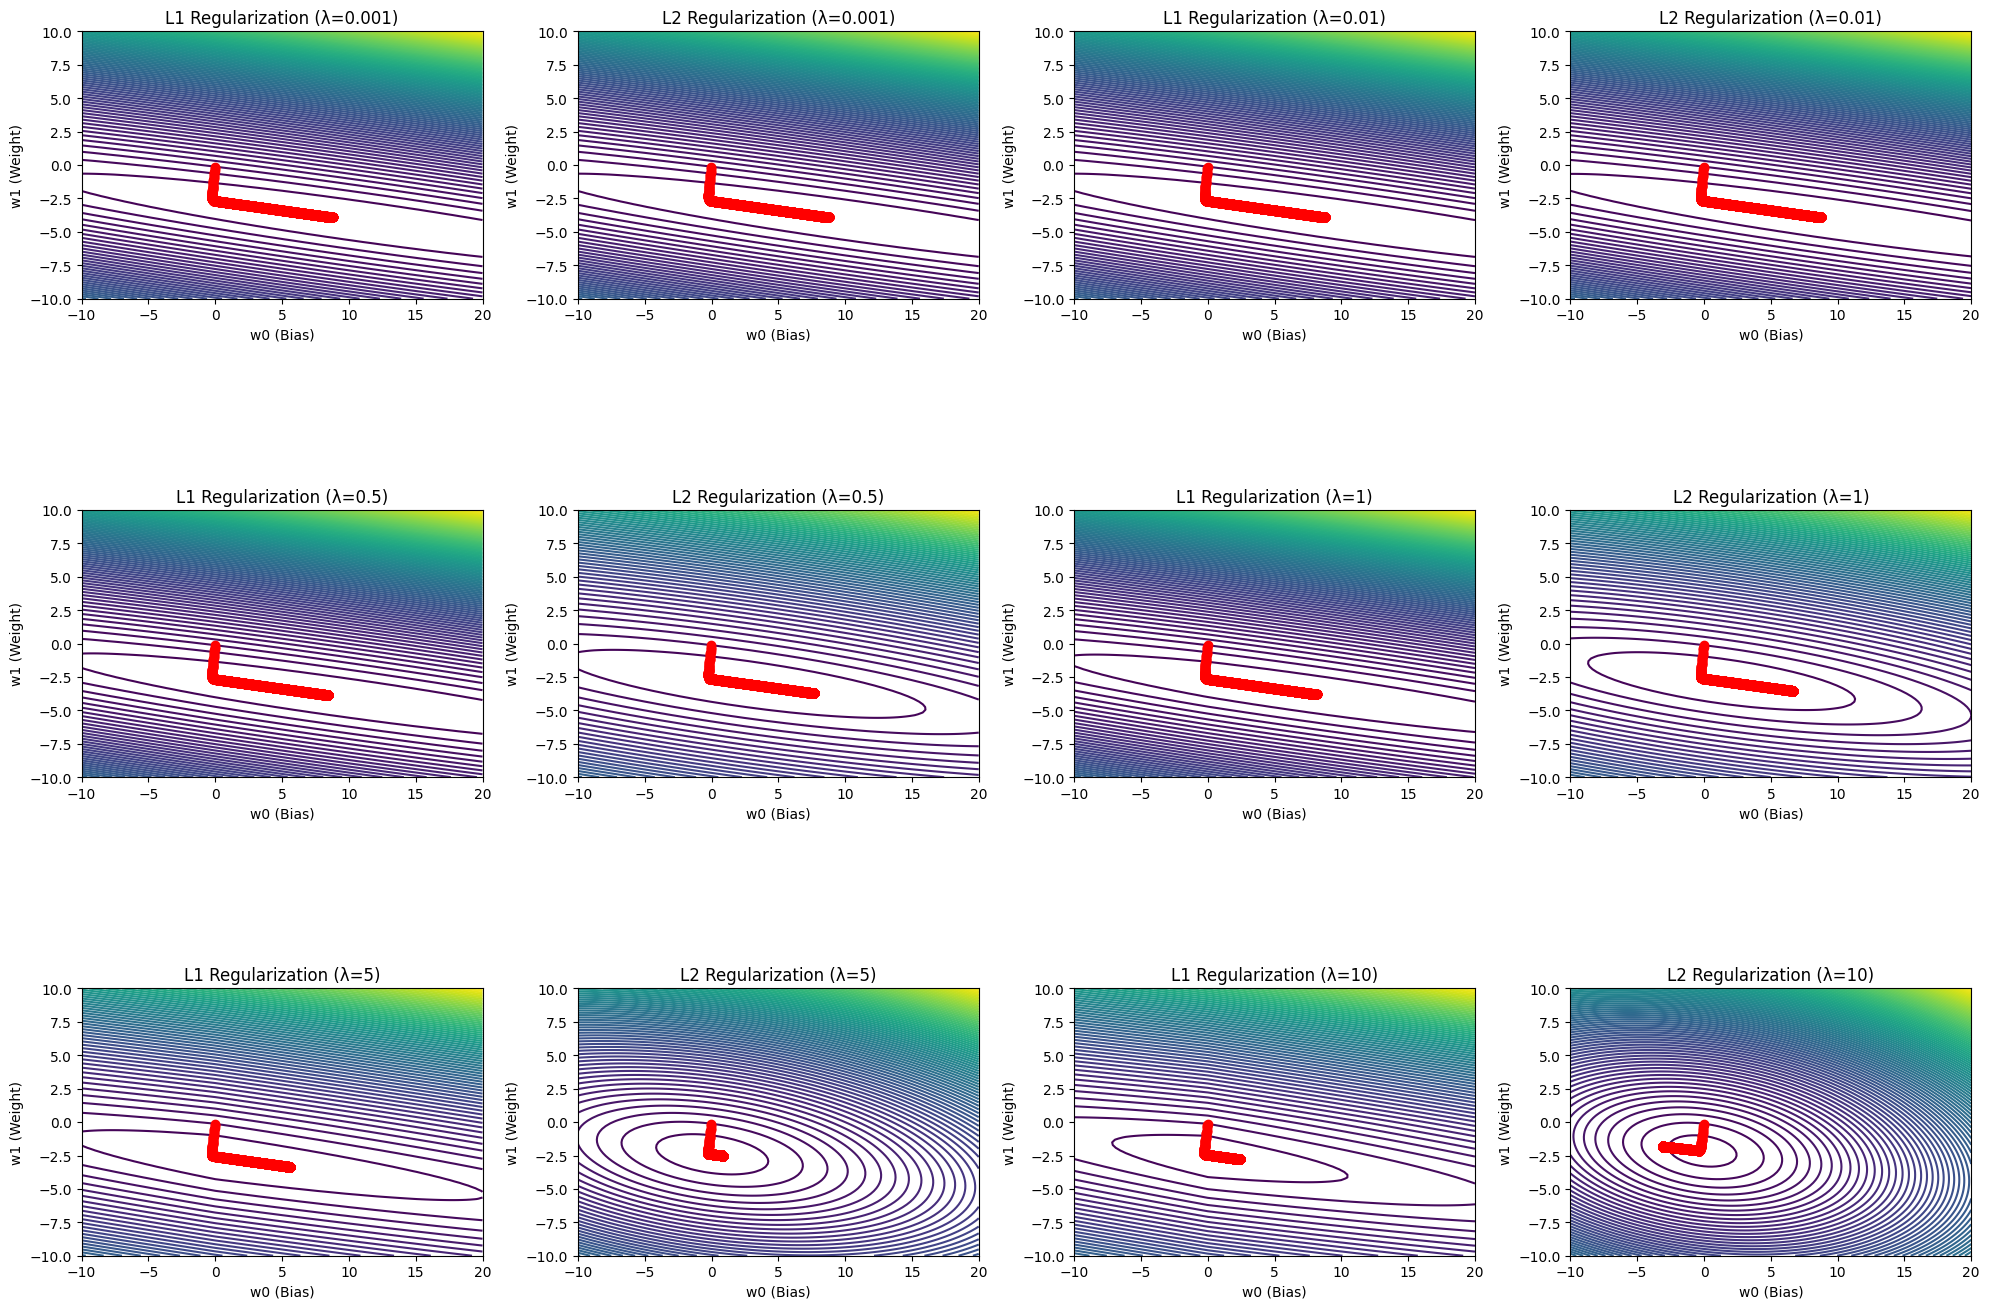

In [ ]:
def plot_multiple_lambdas(lambdas):
    x = np.random.uniform(0, 10, 50)
    # init a random vector
    epsilon = np.random.normal(0, 1, 50)
    y = -4 * x + 10 + 2 * epsilon
    X = x.reshape(-1, 1)

    # set the axes, get fig
    fig, axes = plt.subplots(len(lambdas) // 2 + len(lambdas) % 2, 4, figsize=(20, 5 * ((len(lambdas) + 1) // 2)))

    for i, lam in enumerate(lambdas):
        row = i // 2
        col_L1 = (i % 2) * 2
        col_L2 = col_L1 + 1

        # Plotting
        ax1 = axes[row, col_L1]
        plot_contour(lambda w: contour_loss(w, X, y, lam, 'L1'), [-10, 20], [-10, 10], 100, ax1)
        model_l1 = GDRegressionModel(reg_type='L1', lam=lam, num_iterations=10000, learning_rate=0.001)
        model_l1.fit(X, y)
        trajectory_l1 = np.array(model_l1.trajectory)
        ax1.plot(trajectory_l1[:, 0], trajectory_l1[:, 1], marker='o', color='red')
        ax1.set_xlim([-10, 20])
        ax1.set_ylim([-10, 10])
        ax1.set_aspect('equal')
        ax1.set_title(f'L1 Regularization (λ={lam})')
        ax1.set_xlabel('w0 (Bias)')
        ax1.set_ylabel('w1 (Weight)')

        ax2 = axes[row, col_L2]
        plot_contour(lambda w: contour_loss(w, X, y, lam, 'L2'), [-10, 20], [-10, 10], 100, ax2)
        model_l2 = GDRegressionModel(reg_type='L2', lam=lam, num_iterations=10000, learning_rate=0.001)
        model_l2.fit(X, y)
        trajectory_l2 = np.array(model_l2.trajectory)
        ax2.plot(trajectory_l2[:, 0], trajectory_l2[:, 1], marker='o', color='red')
        ax2.set_xlim([-10, 20])
        ax2.set_ylim([-10, 10])
        ax2.set_aspect('equal')
        ax2.set_title(f'L2 Regularization (λ={lam})')
        ax2.set_xlabel('w0 (Bias)')
        ax2.set_ylabel('w1 (Weight)')

    plt.tight_layout()
    plt.show()

# set the lambdas
lambdas = [0.001, 0.01, 0.5, 1, 5, 10]
# call
plot_multiple_lambdas(lambdas)